# Import libraries

In [104]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data overview

In [105]:
df = pd.read_csv('crop_yield.csv')

In [106]:
df.shape

(19689, 10)

In [107]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [109]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [110]:
df.duplicated().sum()

0

In [111]:
df.describe(include = 'object')

,Crop,Season,State
count,19689,19689,19689
unique,55,6,30
top,Rice,Kharif,Karnataka
freq,1197,8232,1432


In [112]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

# EDA

In [113]:
from sklearn.preprocessing import LabelEncoder
df1 = df.copy()
cat_col = df1.select_dtypes(include='object').columns.tolist()
lab_en = LabelEncoder()
for i in cat_col:
    df1[i] = lab_en.fit_transform(df1[i])

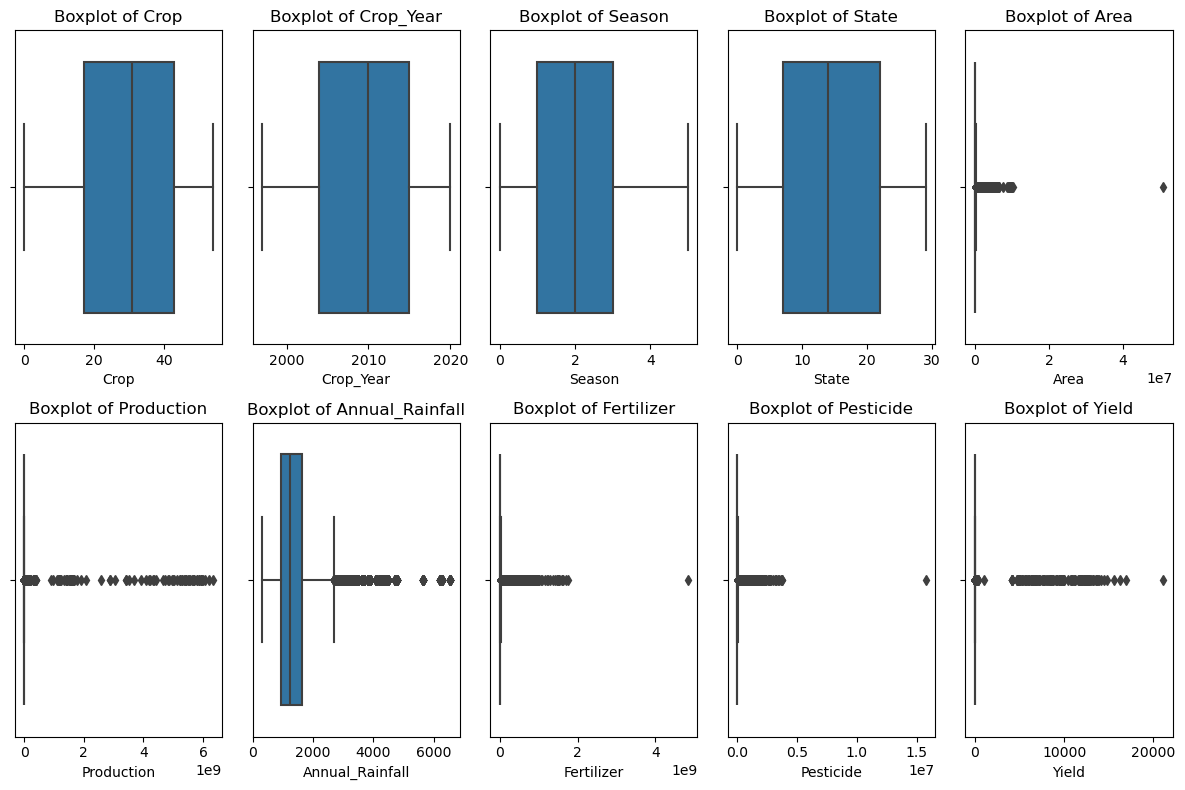

In [114]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(2, 5, i) 
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

In [115]:
max_value_row = df['Area'].idxmax()
df = df.drop(max_value_row)
max_value_row = df1['Area'].idxmax()
df1 = df1.drop(max_value_row)

<Axes: >

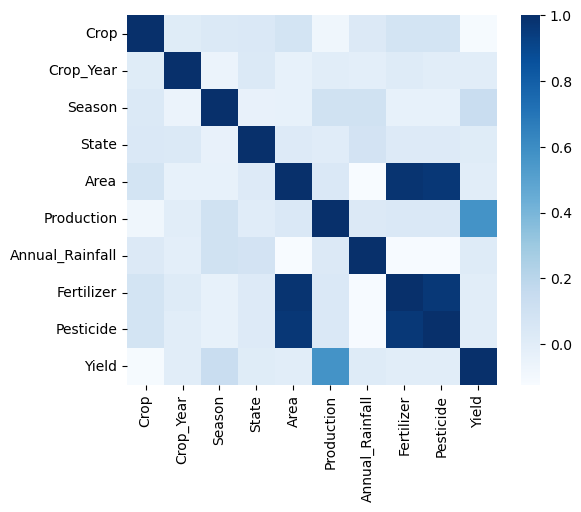

In [116]:
sns.heatmap(df1.corr(), cmap = plt.cm.Blues, square = True)

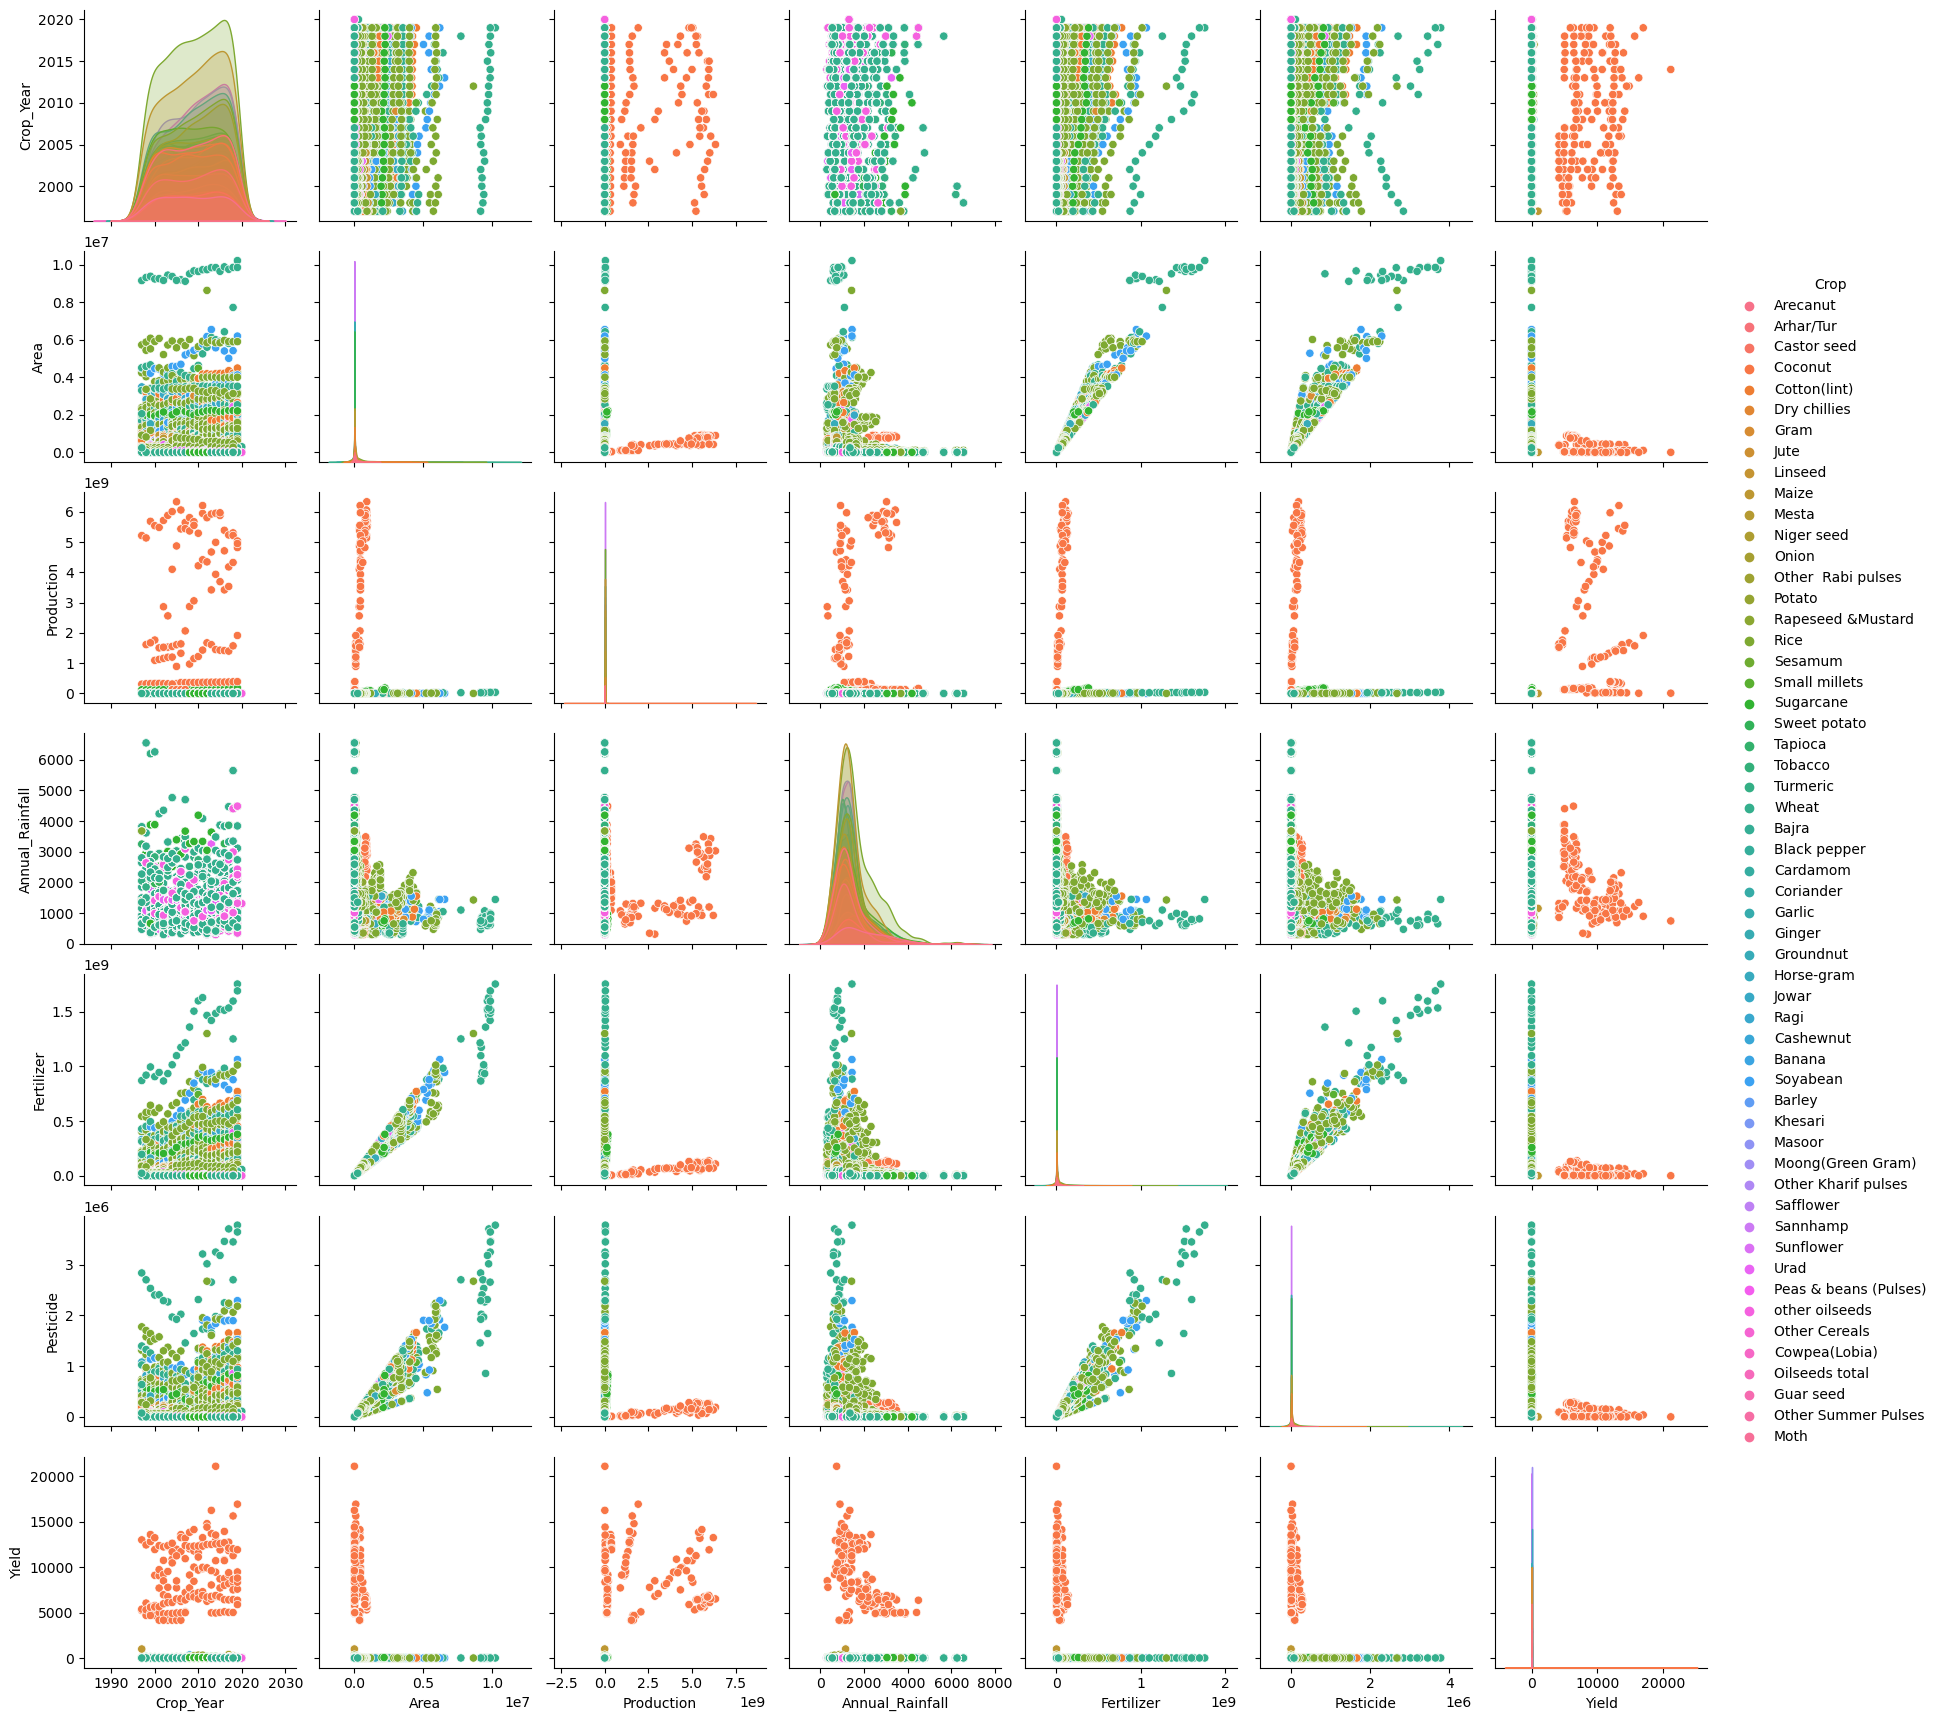

In [117]:
sns.pairplot(data= df,hue = 'Crop')

Text(0, 0.5, 'Pesticide')

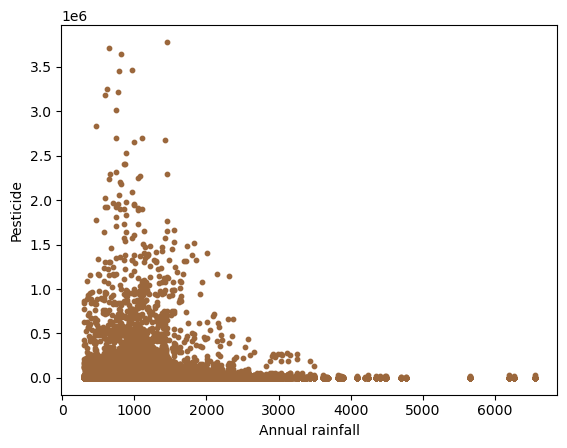

In [118]:
plt.scatter(df['Annual_Rainfall'], df['Pesticide'],s=10,color='#9B673C')
plt.xlabel('Annual rainfall')
plt.ylabel('Pesticide')

In [119]:
df['State'].unique()

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [120]:
df['State'].nunique()

30

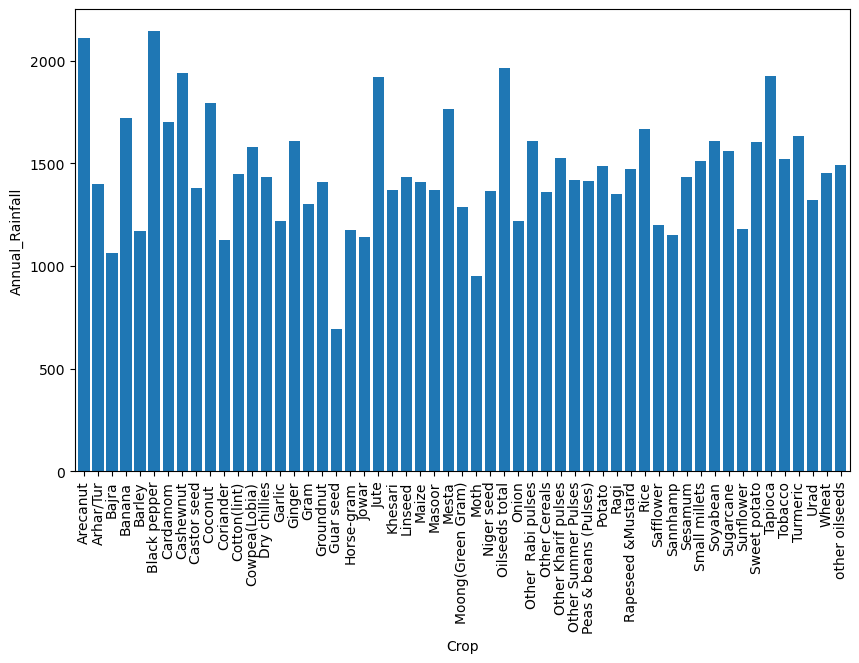

In [121]:
b = df.groupby('Crop')['Annual_Rainfall'].mean()
a = b.plot(kind='bar', figsize=(10, 6), width=0.8)
a.set_ylabel('Annual_Rainfall')
plt.show()

In [122]:
states_per_lot = 6
unique_states = sorted(df['State'].unique())
state_lots = [unique_states[i:i+states_per_lot] for i in range(0, len(unique_states), states_per_lot)]

In [123]:
state_lots

[['Andhra Pradesh',
  'Arunachal Pradesh',
  'Assam',
  'Bihar',
  'Chhattisgarh',
  'Delhi'],
 ['Goa',
  'Gujarat',
  'Haryana',
  'Himachal Pradesh',
  'Jammu and Kashmir',
  'Jharkhand'],
 ['Karnataka',
  'Kerala',
  'Madhya Pradesh',
  'Maharashtra',
  'Manipur',
  'Meghalaya'],
 ['Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Sikkim'],
 ['Tamil Nadu',
  'Telangana',
  'Tripura',
  'Uttar Pradesh',
  'Uttarakhand',
  'West Bengal']]

In [124]:
for i in range(0, len(state_lots)):
    df2 = df[df['State'].isin(state_lots[i])]
    df3 = df2.groupby(['State', 'Crop'])['Yield'].mean().reset_index()
    df4 = df3.sort_values(by = ['Yield'], ascending = False)
    display(df4.head())

,State,Crop,Yield
7,Andhra Pradesh,Coconut,11734.825149
74,Assam,Coconut,7185.238140
38,Andhra Pradesh,Sugarcane,81.748303
197,Delhi,Sugarcane,69.290625
194,Delhi,Potato,65.811250


,State,Crop,Yield
4,Goa,Coconut,5042.722647
15,Gujarat,Banana,66.067491
39,Gujarat,Sugarcane,65.684749
74,Haryana,Sugarcane,54.581250
10,Goa,Sugarcane,51.342955


,State,Crop,Yield
8,Karnataka,Coconut,6627.822040
51,Kerala,Coconut,6270.147795
37,Karnataka,Sugarcane,87.883998
151,Maharashtra,Sugarcane,67.989888
73,Kerala,Sugarcane,64.860805


,State,Crop,Yield
109,Puducherry,Coconut,11354.781792
127,Puducherry,Sugarcane,108.787273
152,Punjab,Sugarcane,66.686639
97,Odisha,Sugarcane,57.298353
56,Nagaland,Sugarcane,39.580553


,State,Crop,Yield
50,Telangana,Coconut,18679.500000
191,West Bengal,Coconut,12503.392944
8,Tamil Nadu,Coconut,11207.504971
38,Tamil Nadu,Sugarcane,102.990176
221,West Bengal,Sugarcane,83.142007


In [42]:
df_g = df.groupby(['State', 'Crop'])['Yield'].mean().reset_index()
df_sg = df_g.sort_values(by=['State', 'Yield'], ascending=[True, False])
highest_yield_crops = df_sg.groupby('State').first().reset_index()
display(highest_yield_crops)

,State,Crop,Yield
0,Andhra Pradesh,Coconut,11734.825149
1,Arunachal Pradesh,Sugarcane,18.955751
2,Assam,Coconut,7185.238140
3,Bihar,Sugarcane,48.321514
4,Chhattisgarh,Bajra,17.100958
5,Delhi,Sugarcane,69.290625
6,Goa,Coconut,5042.722647
7,Gujarat,Banana,66.067491
8,Haryana,Sugarcane,54.581250
9,Himachal Pradesh,Sugarcane,12.509461


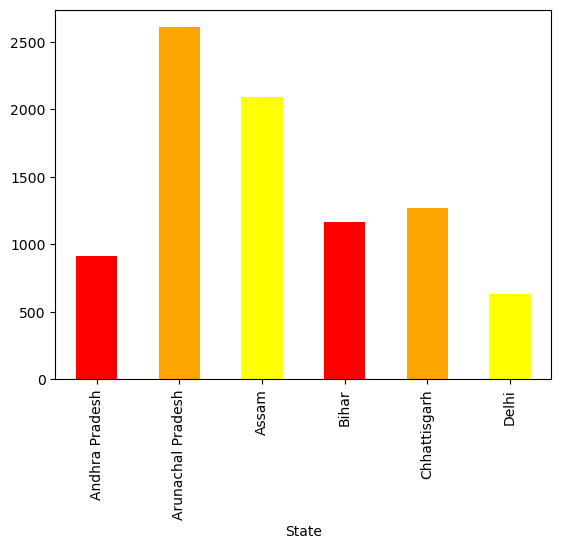

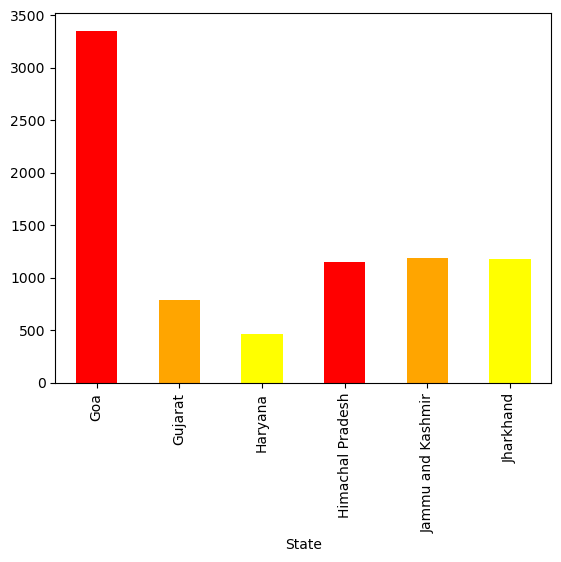

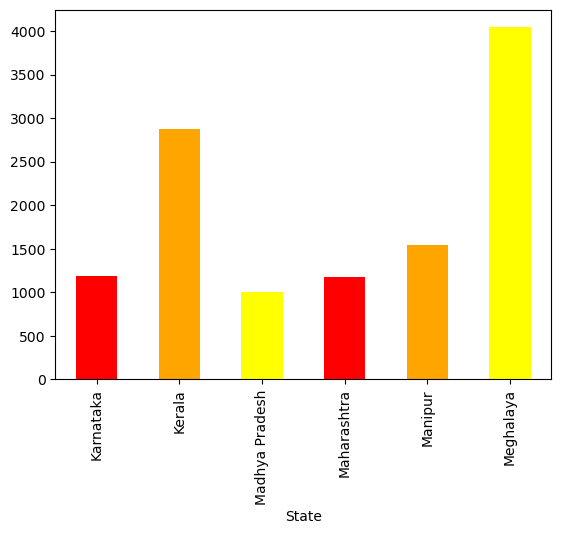

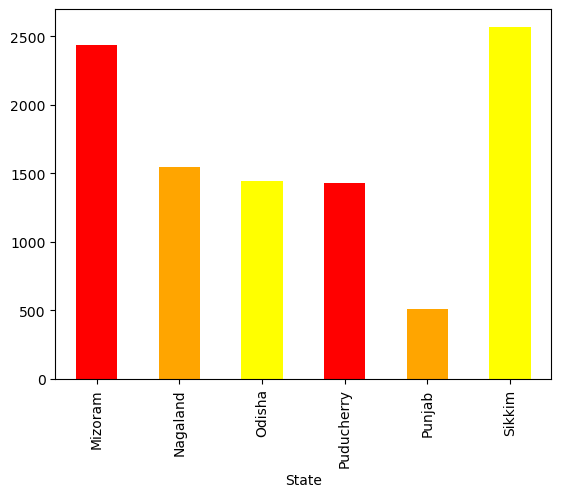

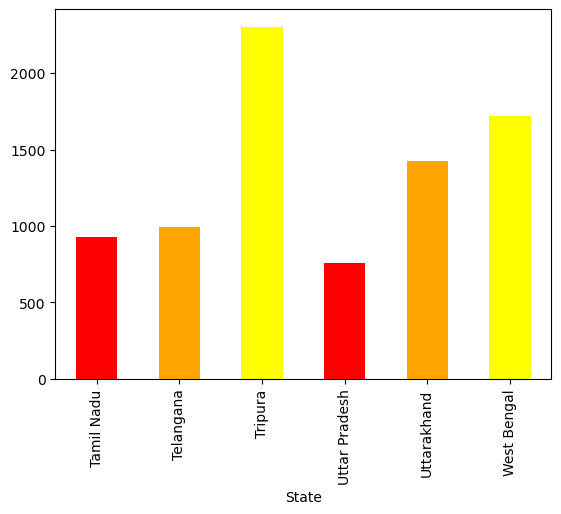

In [125]:
for i in range(0, len(state_lots)):
    df2 = df[df['State'].isin(state_lots[i])]
    df3 = df2.groupby(['State'])['Annual_Rainfall'].mean().plot(kind = 'bar', color = ['red', 'orange', 'yellow'])
    plt.show()

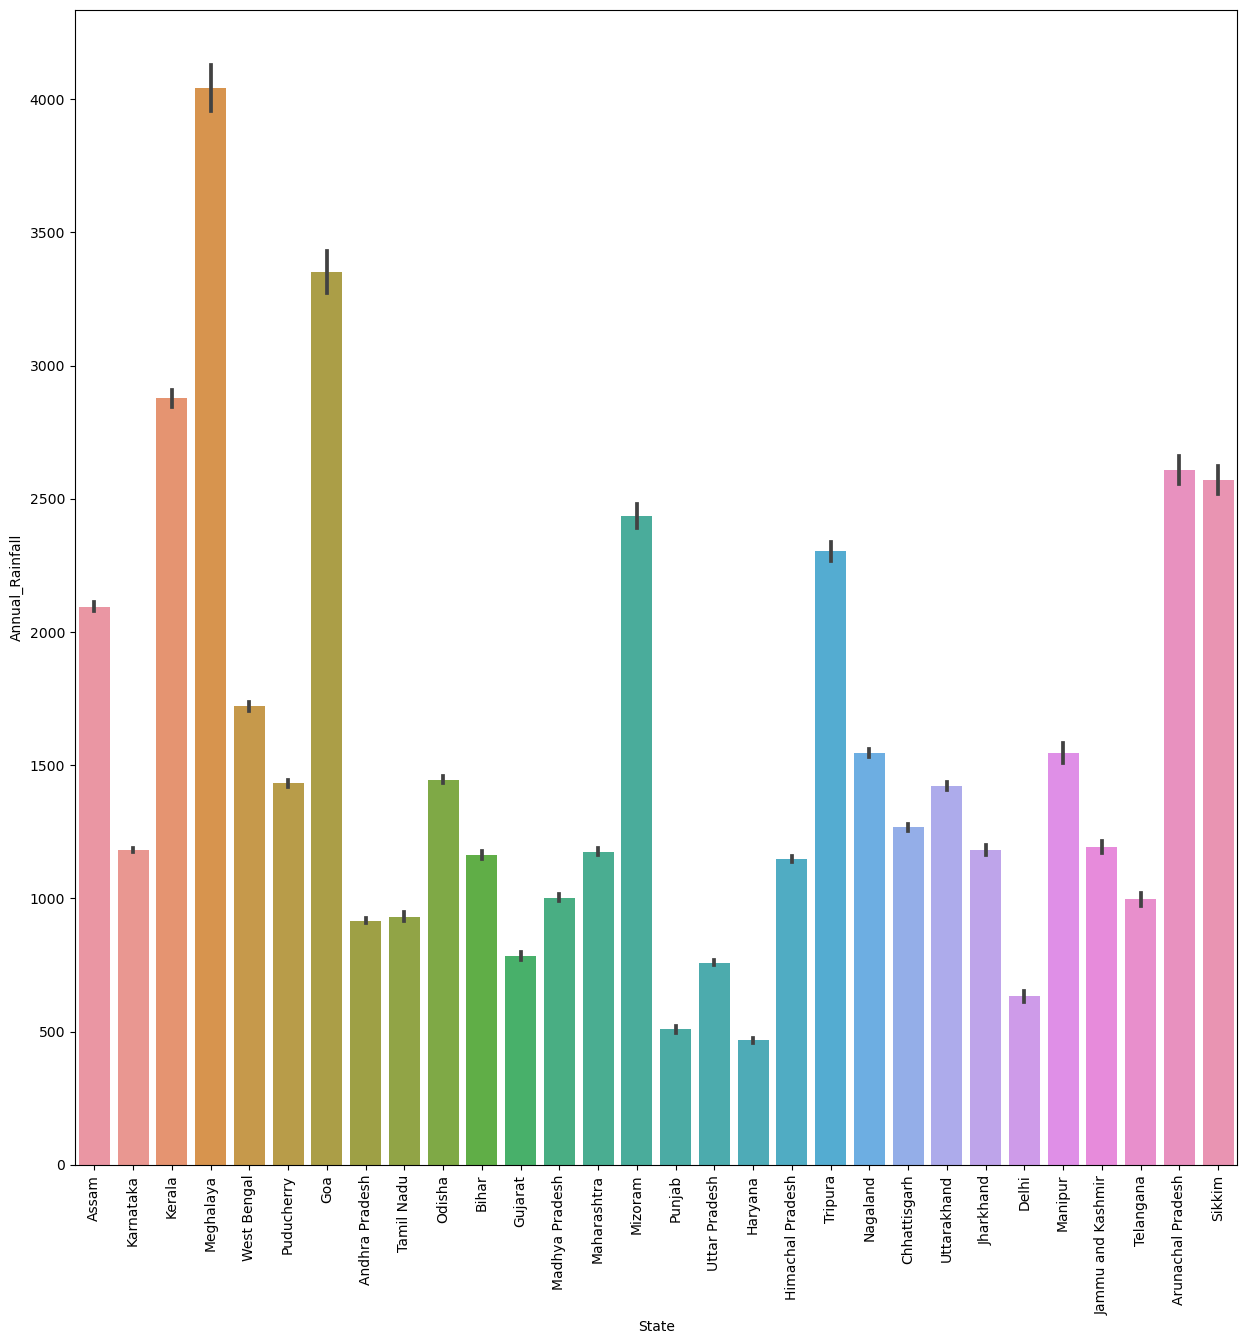

In [126]:
plt.figure(figsize = (15,15))
sns.barplot(data=df, x = df['State'], y = df['Annual_Rainfall'])
plt.xticks(rotation=90)
plt.show()

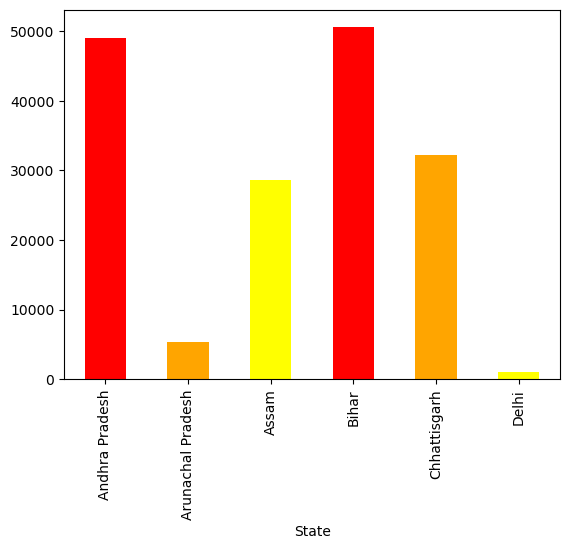

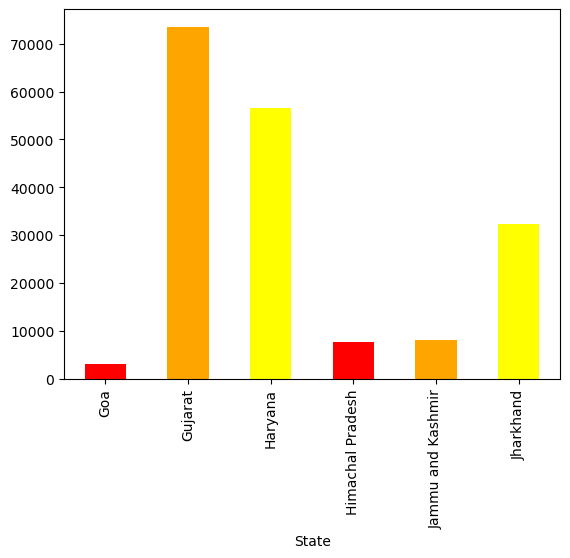

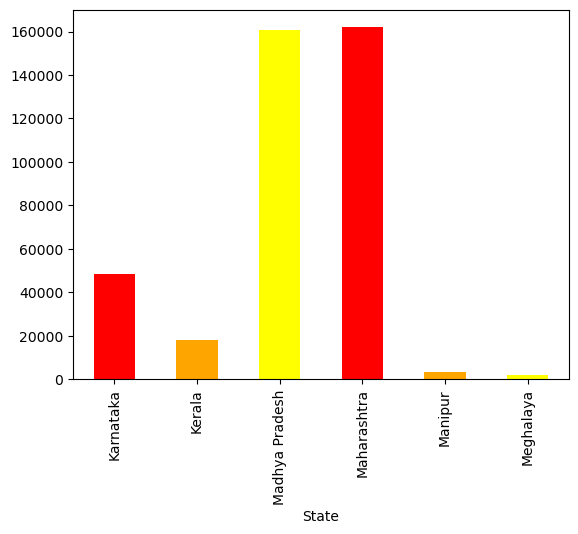

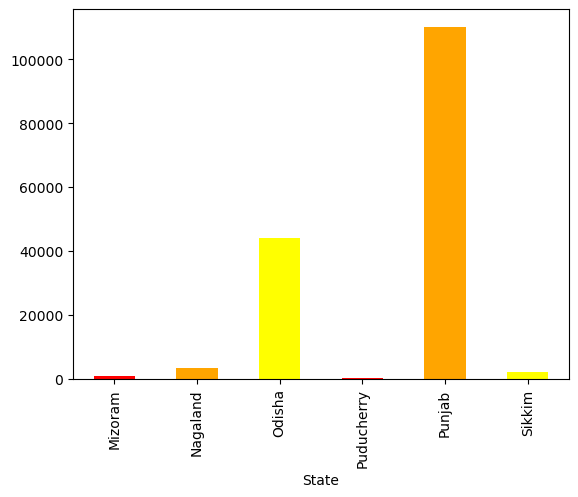

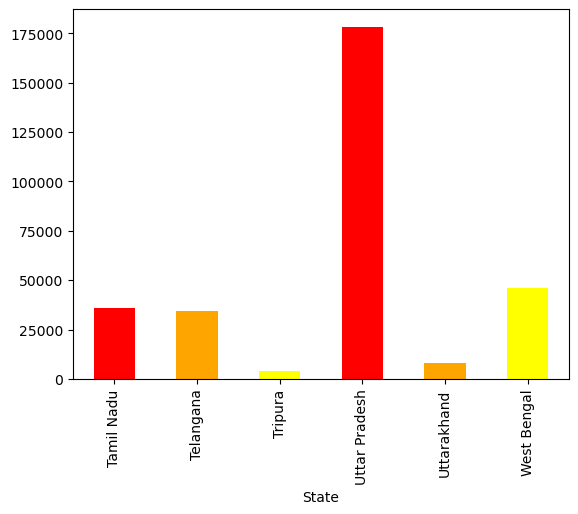

In [127]:
for i in range(0, len(state_lots)):
    df2 = df[df['State'].isin(state_lots[i])]
    df3 = df2.groupby(['State'])['Pesticide'].mean().plot(kind = 'bar', color = ['red', 'orange', 'yellow'])
    plt.show()

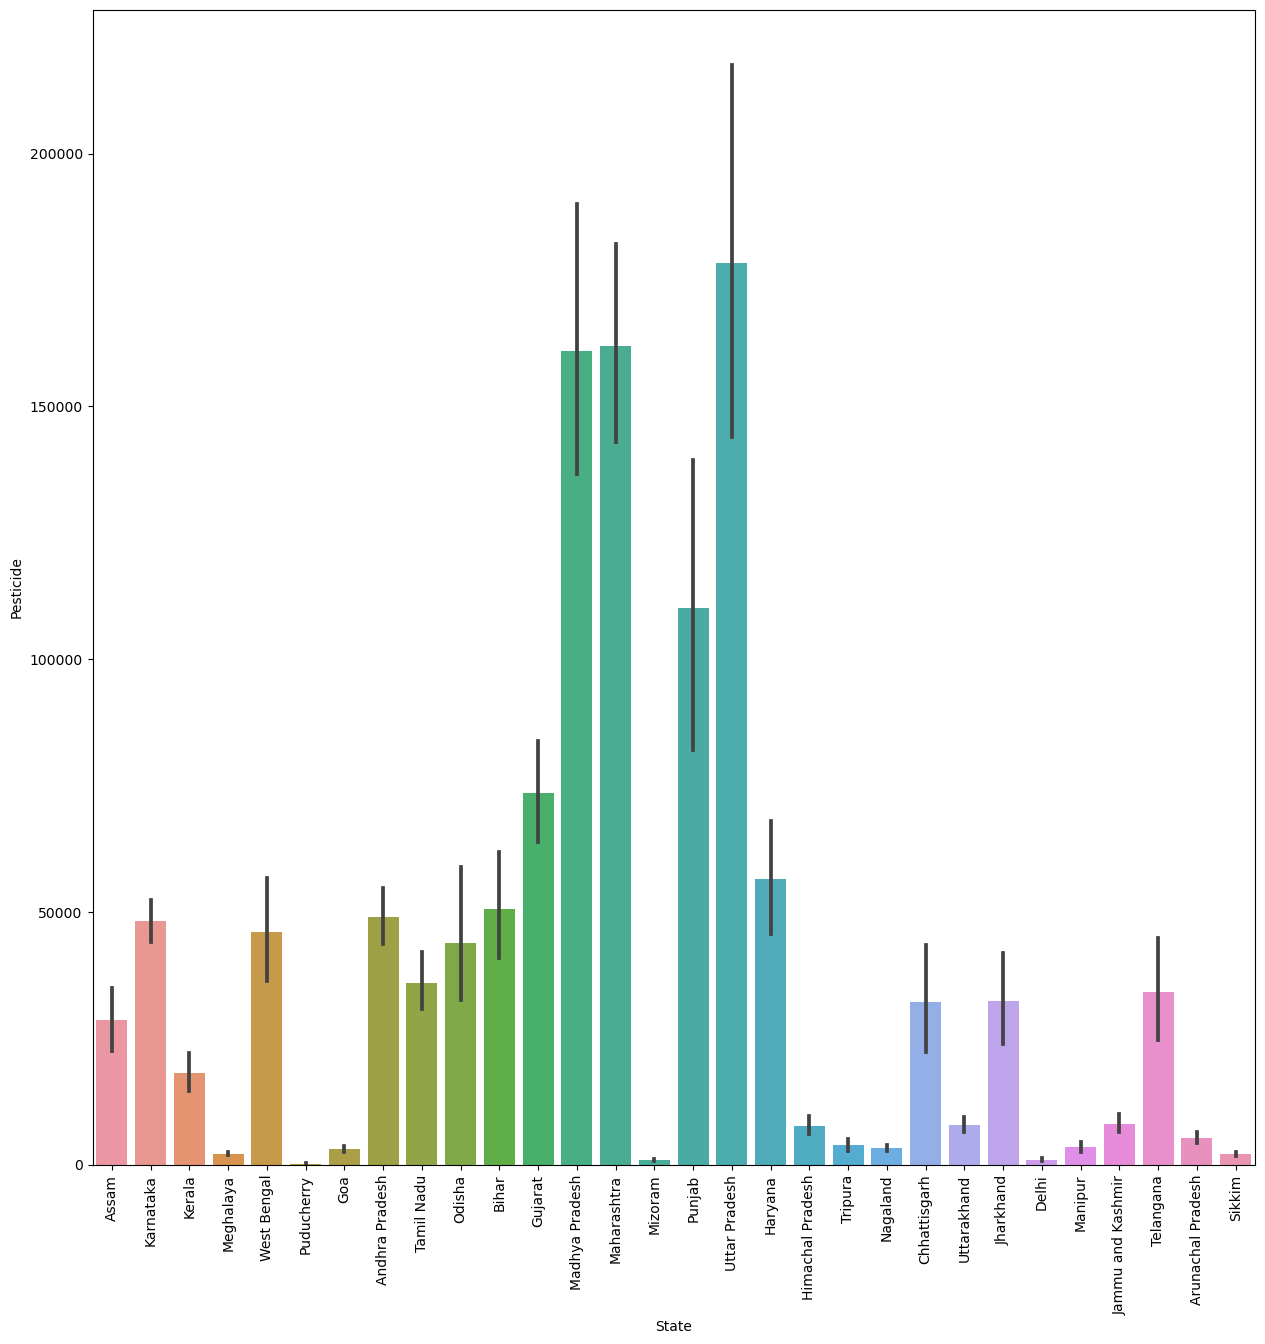

In [128]:
plt.figure(figsize = (15,15))
sns.barplot(data=df, x = df['State'], y = df['Pesticide'])
plt.xticks(rotation=90)
plt.show()

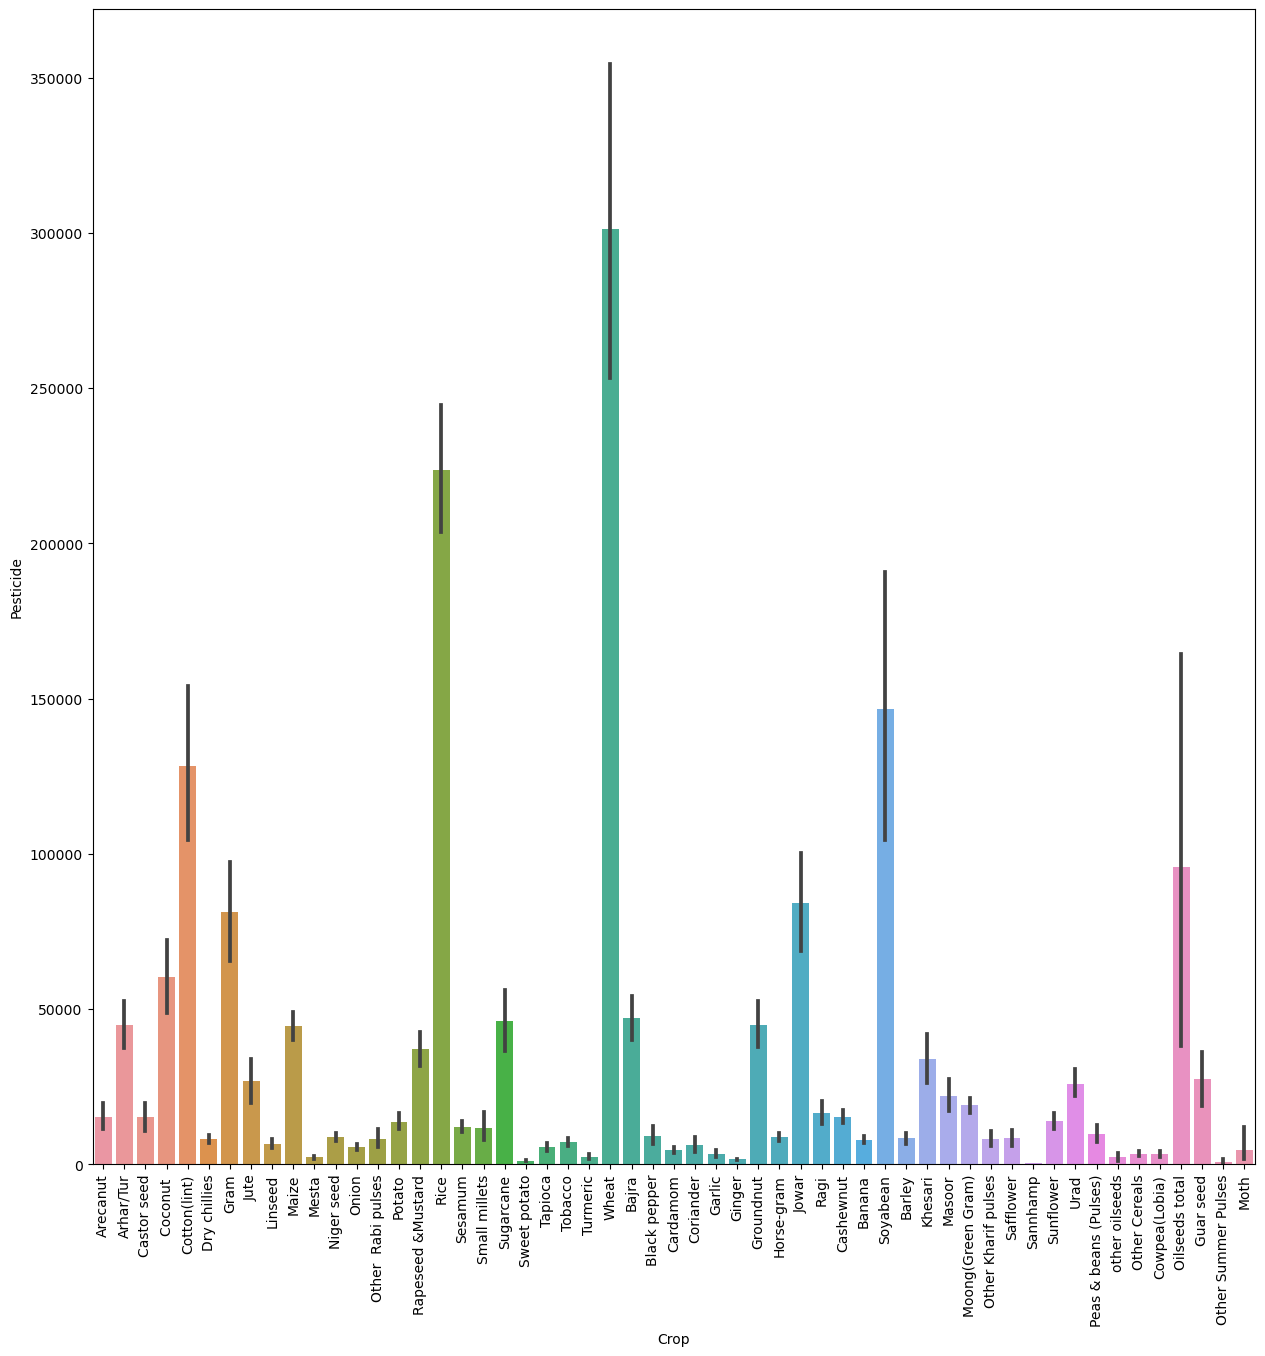

In [129]:
plt.figure(figsize = (15,15))
sns.barplot(data=df, x = df['Crop'], y = df['Pesticide'])
plt.xticks(rotation=90)
plt.show()

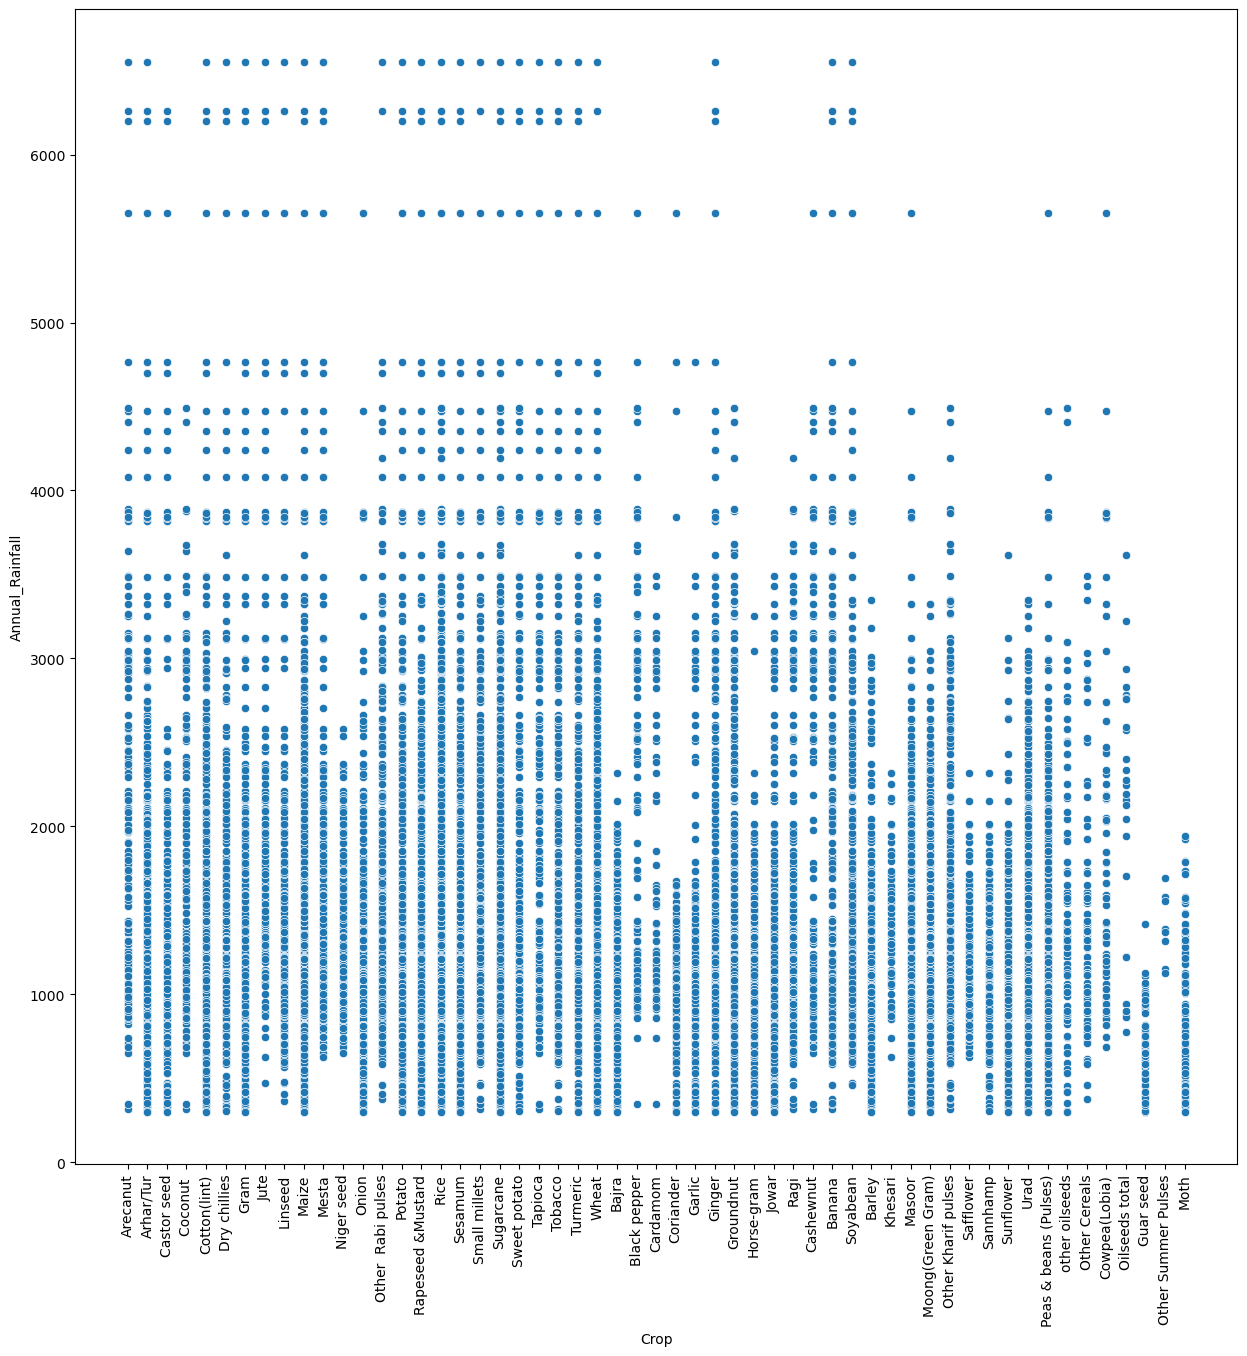

In [131]:
plt.figure(figsize = (15,15))
sns.scatterplot(data=df, x = df['Crop'], y = df['Annual_Rainfall'])
plt.xticks(rotation=90)
plt.show()

In [132]:
df5=df.groupby('Crop')

In [133]:
top_crop = []

In [134]:
for i , j in df5:
    max_production = j[j['Yield'] == j['Yield'].max()]
    area = max_production.iloc[0]['State']
    production = max_production.iloc[0]['Yield']
    top_crop.append({'item': i, 'State': area, 'Yield': production})
    

In [135]:
top_crop = pd.DataFrame(top_crop)
top_crop

,item,State,Yield
0,Arecanut,Karnataka,10.948182
1,Arhar/Tur,Jharkhand,68.230000
2,Bajra,Chhattisgarh,74.303077
3,Banana,Andhra Pradesh,126.387692
4,Barley,Haryana,3.988235
5,Black pepper,Karnataka,4.133571
6,Cardamom,West Bengal,2.870000
7,Cashewnut,Tamil Nadu,338.548966
8,Castor seed,Gujarat,2.466333
9,Coconut,Telangana,21105.000000


<Axes: xlabel='Crop_Year', ylabel='Pesticide'>

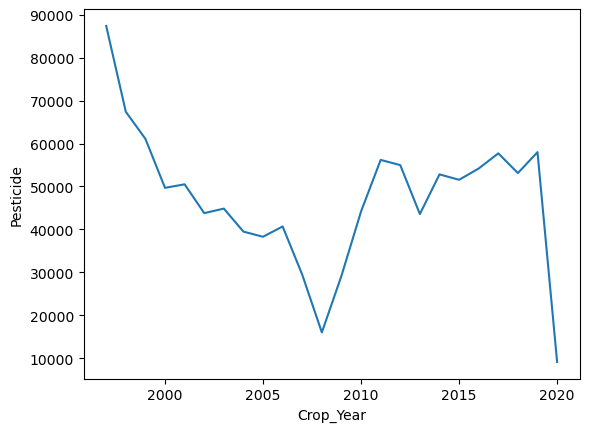

In [136]:
sns.lineplot(data= df.groupby('Crop_Year')['Pesticide'].mean())

<Axes: xlabel='Crop_Year', ylabel='Fertilizer'>

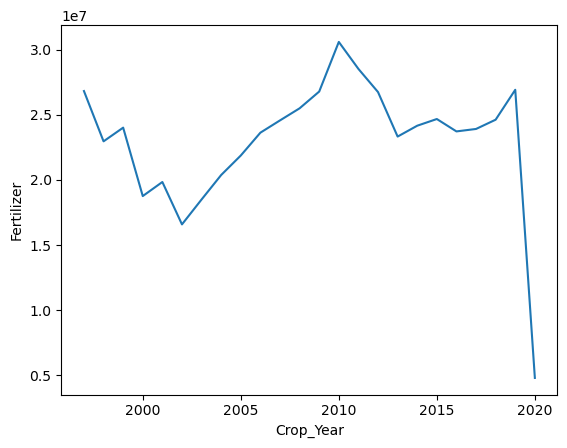

In [137]:
sns.lineplot(data= df.groupby('Crop_Year')['Fertilizer'].mean())

# Deductions from the visuals

# Model building

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




In [166]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 245.8 kB/s eta 0:08:29
   ---------------------------------------- 0.1/124.9 MB 416.7 kB/s eta 0:05:00
   ---------------------------------------- 0.1/124.9 MB 504.4 kB/s eta 0:04:08
   ---------------------------------------- 0.2/124.9 MB 614.4 kB/s eta 0:03:24
   ---------------------------------------- 0.2/124.9 MB 615.9 kB/s eta 0:03:23
   ---------------------------------------- 0.2/124.9 MB 684.7 kB/s eta 0:03:03
   ---------------------------------------- 0.3/124.9 MB 684.6 kB/s eta 0:03:03
   ---------------------------------------- 0.3/124.9 MB 752.2 kB/s eta 0:02

In [139]:
x,y = df1.drop(columns = 'Yield'), df1['Yield']

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

# Model 1 (Linear Regression)

In [141]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [142]:
y_pred = model1.predict(x_test)
y_pred_train= model1.predict(x_train)

In [143]:
print("Accuracy Scores for Linear Regression model")
MSE = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)
R2_score_train = r2_score(y_train, y_pred_train)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Linear Regression model
Mean Squared Error : 479233.54900241026
R-squared Score (Train) : 0.3370340410840761
R-squared Score (Test) : 0.3446847018300463
**********************************************************************


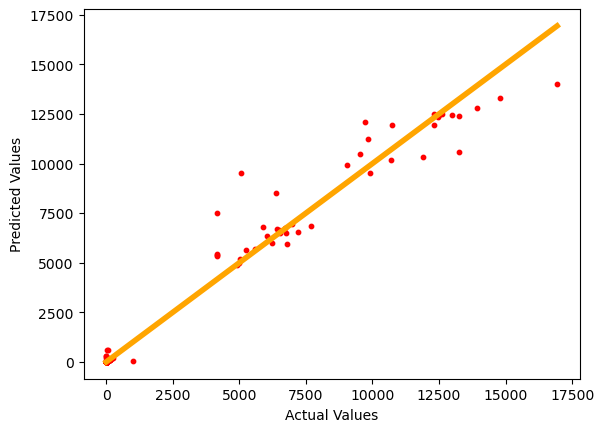

In [179]:
plt.scatter(y_test, y_pred,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

# Model 2 Random forest regressor

In [144]:
model2 = RandomForestRegressor(random_state=42)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [145]:
y_pred2 = model2.predict(x_test)
y_pred_train2= model2.predict(x_train)

In [146]:
print("Accuracy Scores for Random forest regressor model")
MSE = mean_squared_error(y_test, y_pred2)
R2_score = r2_score(y_test, y_pred2)
R2_score_train = r2_score(y_train, y_pred_train2)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Random forest regressor model
Mean Squared Error : 17318.57902672635
R-squared Score (Train) : 0.9930795387884628
R-squared Score (Test) : 0.9763181651151013
**********************************************************************


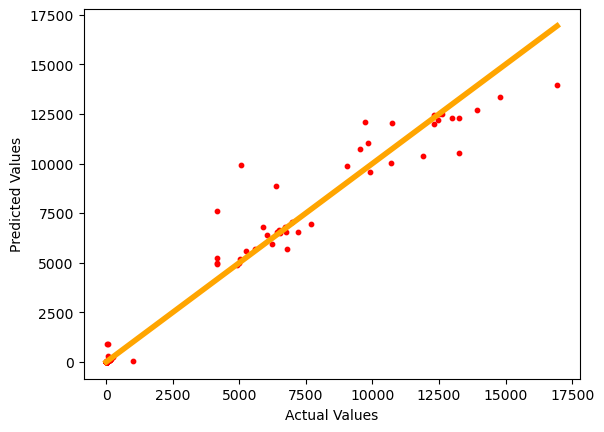

In [180]:
plt.scatter(y_test, y_pred2,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

# Model 3 Decision tree regressor

In [147]:
model3 = DecisionTreeRegressor(random_state=42)
model3.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [148]:
y_pred3 = model3.predict(x_test)
y_pred_train3= model3.predict(x_train)

In [149]:
print("Accuracy Scores for Random forest regressor model")
MSE = mean_squared_error(y_test, y_pred3)
R2_score = r2_score(y_test, y_pred3)
R2_score_train = r2_score(y_train, y_pred_train3)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Random forest regressor model
Mean Squared Error : 29429.478209916695
R-squared Score (Train) : 1.0
R-squared Score (Test) : 0.959757434911927
**********************************************************************


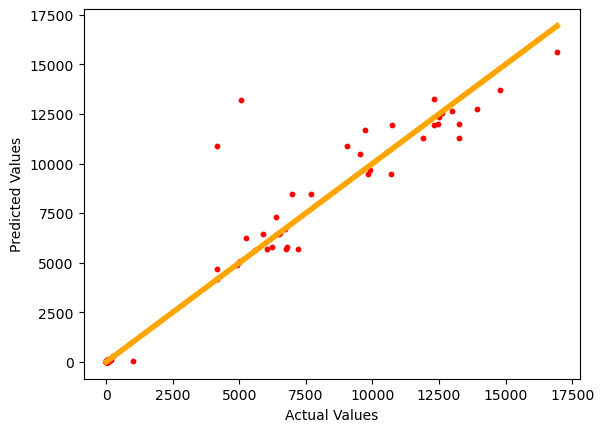

In [181]:
plt.scatter(y_test, y_pred3,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

# Model 4 XG boost regressor

In [150]:
model4 = XGBRegressor(random_state=42)
model4.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [151]:
y_pred4 = model4.predict(x_test)
y_pred_train4= model4.predict(x_train)

In [152]:
print("Accuracy Scores for Random forest regressor model")
MSE = mean_squared_error(y_test, y_pred4)
R2_score = r2_score(y_test, y_pred4)
R2_score_train = r2_score(y_train, y_pred_train4)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Random forest regressor model
Mean Squared Error : 14027.084577148342
R-squared Score (Train) : 0.9999981204653523
R-squared Score (Test) : 0.9808190325337951
**********************************************************************


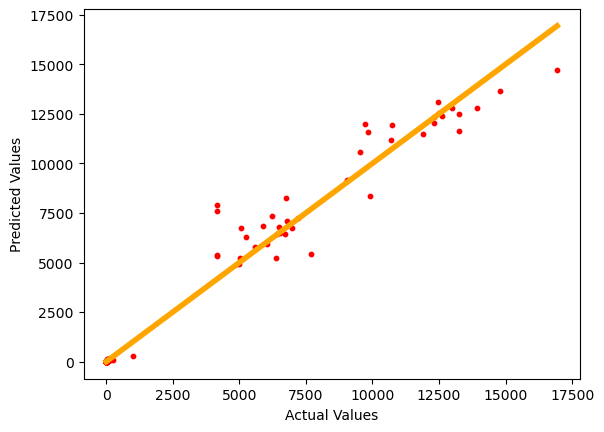

In [182]:
plt.scatter(y_test, y_pred4,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

# Model 5 Gradient boosting regressor

In [153]:
model5 = GradientBoostingRegressor(n_estimators=125, learning_rate=0.1, max_depth=3,random_state=42)
model5.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=125, random_state=42)

In [154]:
y_pred5 = model5.predict(x_test)
y_pred_train5= model5.predict(x_train)

In [155]:
print("Accuracy Scores for Random forest regressor model")
MSE = mean_squared_error(y_test, y_pred5)
R2_score = r2_score(y_test, y_pred5)
R2_score_train = r2_score(y_train, y_pred_train5)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Random forest regressor model
Mean Squared Error : 17225.89699531115
R-squared Score (Train) : 0.9986912417592112
R-squared Score (Test) : 0.9764449007186046
**********************************************************************


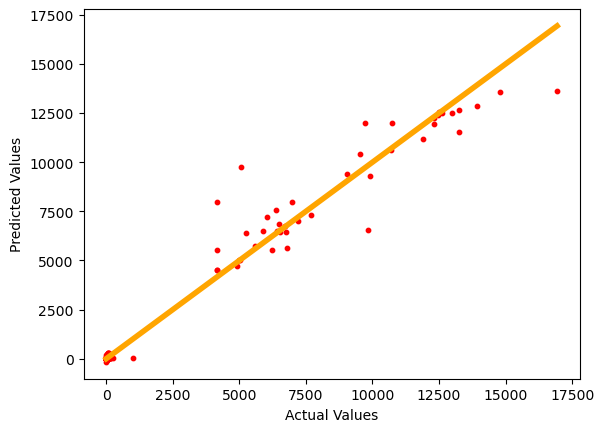

In [183]:
plt.scatter(y_test, y_pred5,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

# Model 6 KNN

In [156]:
model6 = KNeighborsRegressor(n_neighbors=5)
model6.fit(x_train, y_train)

KNeighborsRegressor()

In [157]:
y_pred6 = model6.predict(x_test)
y_pred_train6= model6.predict(x_train)

In [158]:
print("Accuracy Scores for Random forest regressor model")
MSE = mean_squared_error(y_test, y_pred6)
R2_score = r2_score(y_test, y_pred6)
R2_score_train = r2_score(y_train, y_pred_train6)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Random forest regressor model
Mean Squared Error : 77851.73021469361
R-squared Score (Train) : 0.9493120560556217
R-squared Score (Test) : 0.8935437013854968
**********************************************************************


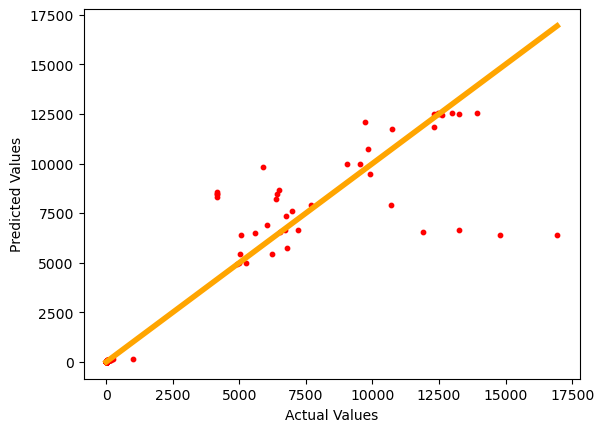

In [184]:
plt.scatter(y_test, y_pred6,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

# Model 7 Bagging regressor

In [159]:
model7 = BaggingRegressor(n_estimators=150, random_state=42)
model7.fit(x_train, y_train)

BaggingRegressor(n_estimators=150, random_state=42)

In [160]:
y_pred7 = model7.predict(x_test)
y_pred_train7= model7.predict(x_train)

In [161]:
print("Accuracy Scores for Random forest regressor model")
MSE = mean_squared_error(y_test, y_pred7)
R2_score = r2_score(y_test, y_pred7)
R2_score_train = r2_score(y_train, y_pred_train7)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Random forest regressor model
Mean Squared Error : 16058.4688849136
R-squared Score (Train) : 0.9932698374604807
R-squared Score (Test) : 0.9780412695493129
**********************************************************************


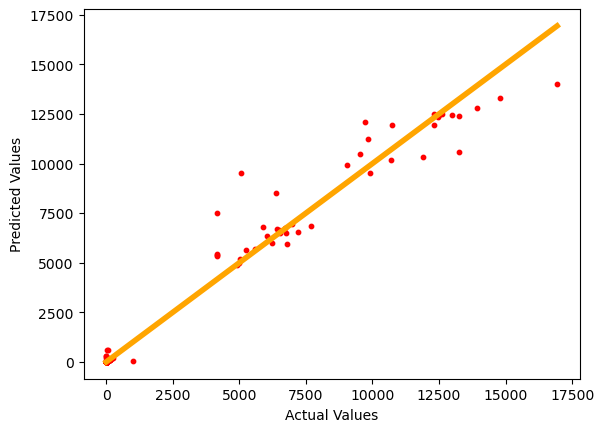

In [185]:
plt.scatter(y_test, y_pred7,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

# Model 8 Voting regressor

In [162]:
model8 = VotingRegressor(estimators=[('rf', model2), ('dt', model3), ('br', model7)])
model8.fit(x_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('dt', DecisionTreeRegressor(random_state=42)),
                            ('br',
                             BaggingRegressor(n_estimators=150,
                                              random_state=42))])

In [163]:
y_pred8 = model8.predict(x_test)
y_pred_train8= model8.predict(x_train)

In [164]:
print("Accuracy Scores for Random forest regressor model")
MSE = mean_squared_error(y_test, y_pred8)
R2_score = r2_score(y_test, y_pred8)
R2_score_train = r2_score(y_train, y_pred_train8)
print("Mean Squared Error :", MSE)
print("R-squared Score (Train) :",R2_score_train)
print("R-squared Score (Test) :", R2_score)
print("**************" * 5)

Accuracy Scores for Random forest regressor model
Mean Squared Error : 18848.042775875518
R-squared Score (Train) : 0.9969901023506001
R-squared Score (Test) : 0.9742267401827271
**********************************************************************


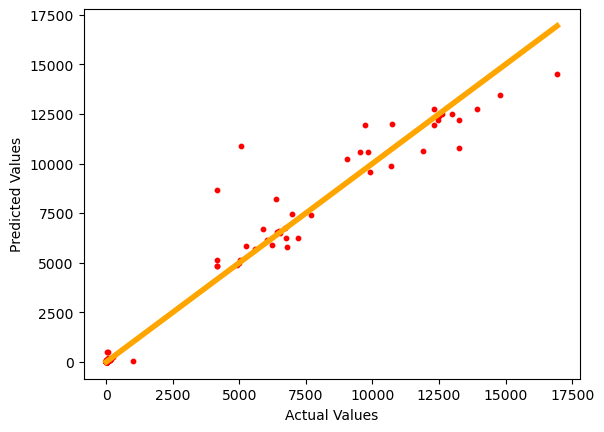

In [186]:
plt.scatter(y_test, y_pred8,s=10,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth = 4)
plt.show()

In [97]:
model_names = ['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8']
r2_scores = [r2_score(y_test, model.predict(x_test)) for model in [model1, model2, model3, model4, model5, model6, model7, model8]]
mse_scores = [mean_squared_error(y_test, model.predict(x_test)) for model in [model1, model2, model3, model4, model5, model6, model7, model8]]
model_name = ['Linear regression', 'Random forest', 'Decision tree', 'XGBoost', 'Gradientboosting', 'knn', 'bagging regressor', 'voting regressor']
results = pd.DataFrame({
    'Model': model_name,
    'R² Score': r2_scores,
    'MSE': mse_scores
})

print(results)

               Model  R² Score            MSE
0  Linear regression  0.344685  479233.549002
1      Random forest  0.976318   17318.579027
2      Decision tree  0.959757   29429.478210
3            XGBoost  0.980819   14027.084577
4   Gradientboosting  0.976445   17225.896995
5                knn  0.893544   77851.730215
6  bagging regressor  0.978041   16058.468885
7   voting regressor  0.974227   18848.042776


# Cross validation

In [178]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)
    results = cross_val_score(model, x, y, cv=kfold_validation)
    
    print(f"{name} - Cross-Validation Results: {results}")
    print(f"{name} - Mean Score: {np.mean(results)}\n")
   
    

Linear Regression - Cross-Validation Results: [0.32767384 0.28937864 0.33187999 0.23659686 0.43767362 0.39015293
 0.43703044 0.27798965 0.30534021 0.30777878]
Linear Regression - Mean Score: 0.3341494951787076

Random Forest - Cross-Validation Results: [0.96781995 0.9856141  0.89464564 0.78666583 0.99468677 0.97781241
 0.98741866 0.99079391 0.99678622 0.99394631]
Random Forest - Mean Score: 0.9576189800114829

Gradient Boost - Cross-Validation Results: [0.96992282 0.96561368 0.93926645 0.92642548 0.99312255 0.93316305
 0.97724626 0.99221011 0.9956266  0.98846008]
Gradient Boost - Mean Score: 0.9681057067594943

XGBoost - Cross-Validation Results: [0.95799683 0.97983219 0.97058271 0.80322956 0.99328401 0.97420274
 0.98468773 0.98338708 0.99623034 0.98384091]
XGBoost - Mean Score: 0.9627274103272097

KNN - Cross-Validation Results: [0.90021264 0.89174076 0.8236992  0.87840939 0.92837505 0.90805148
 0.96385029 0.94344739 0.96608573 0.95866501]
KNN - Mean Score: 0.9162536943287367

Decisio

# Final conclusion

In [205]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model4, f)
    joblib.dump(lab_en, 'cat_en.pkl')

In [209]:
import joblib 
model = joblib.load('model.pkl')
cat_encoder = joblib.load('cat_en.pkl')
def predict_crop_yield():
    print("Please provide the following details:")
    
    crop = input("Enter the crop (e.g., 'Wheat', 'Rice', etc.): ")
    crop_year = int(input("Enter the crop year (e.g., 2018): "))
    state = input("Enter the state (e.g., 'Assam', 'Punjab', etc.): ")
    season = input("Enter the season (e.g., 'Kharif', 'Whole year', etc.): ")
    fertilizers = float(input("Enter the amount of fertilizers (in kg/ha): "))
    pesticides = float(input("Enter the amount of pesticides (in liters/ha): "))
    area = float(input("Enter the area of the crop (in hectares): "))
    annual_rainfall = float(input("Enter the annual rainfall (in mm): "))
    production = float(input("Enter the production (in tons): "))

    crop_encoded = cat_encoder.transform([crop])[0] 
    state_encoded = cat_encoder.transform([state])[0]  
    season_encoded = cat_encoder.transform([season])[0]

    input_data = np.array([[crop_encoded, crop_year, state_encoded, season_encoded,
                            fertilizers, pesticides, area, annual_rainfall, production]])


    predicted_yield = model.predict(input_data)